The purpose of this notebook is to explore the relationships between suicide/suicide rate and other variables from different countries around the world. There are many other relationships that could be analyzed in this data set, however we will stick to the above features mentioned.


In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [109]:
path=r'C:\Users\Lucas\Desktop\master.csv'

In [110]:
Data=pd.read_csv(path)

First we need to look at the data (Data types, feature names, missing values etc..)

In [111]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


Here the columns are pretty self explanatory. HDI stands for the Human Developement Index, which a statistic that describes ife expectancy, education, and per capita income indicators. 

HDI is the only column with missing values (19456 to be exact), so we need to be aware of this for any analysis.

In [112]:
Data.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

It seems as though some of the data is redundant. Lets go ahead and drop the country-year column as this is contained by the year and country columns in the dataframe. Lets also change the year column to a datetime object for easier computation later, this portrays each year as being the first day of the year, but this wont cause any problems in our computations.

In [113]:
Data.drop('country-year',axis=1,inplace=True)
Data['year']=pd.to_datetime(Data['year'],format='%Y')

In [114]:
Data.head(n=10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987-01-01,male,15-24 years,21,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,Albania,1987-01-01,male,35-54 years,16,308000,5.19,NaN,"2,156,624,900",796,Silent
2,Albania,1987-01-01,female,15-24 years,14,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,Albania,1987-01-01,male,75+ years,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987-01-01,male,25-34 years,9,274300,3.28,NaN,"2,156,624,900",796,Boomers
5,Albania,1987-01-01,female,75+ years,1,35600,2.81,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987-01-01,female,35-54 years,6,278800,2.15,NaN,"2,156,624,900",796,Silent
7,Albania,1987-01-01,female,25-34 years,4,257200,1.56,NaN,"2,156,624,900",796,Boomers
8,Albania,1987-01-01,male,55-74 years,1,137500,0.73,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987-01-01,female,5-14 years,0,311000,0.00,NaN,"2,156,624,900",796,Generation X


It is a common notion that poverty introduces a higher suicide rate. I want to first test this notion by veiwing the data of gpd per capita (a measurment for a countries wealth) and the suicide rate.

As we will find out later in the analysis, females do not contribute to the suicide rate by much, also people of the ages 5-14 years also do not contribute, so we will filter these out and show the data spread.

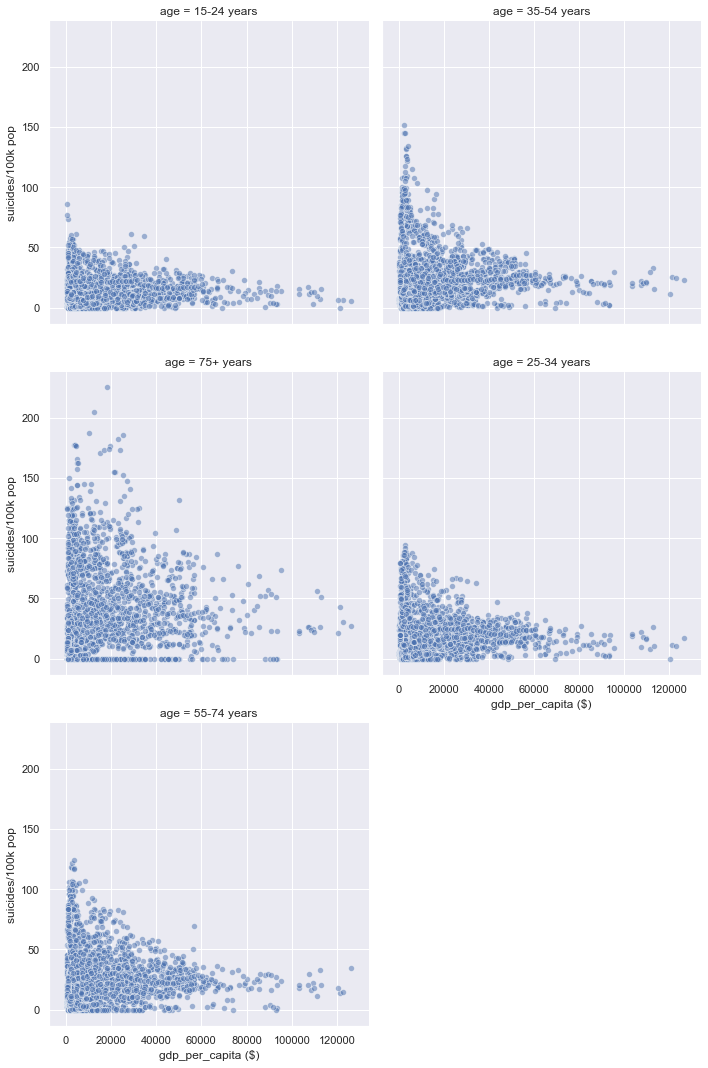

In [115]:
T=Data[(Data.sex!='female')&(Data.age!= "5-14 years")]

sns.relplot(x='gdp_per_capita ($)',y='suicides/100k pop',data=T,col='age',col_wrap=2,alpha=0.5)

There is alot of Data here so I have made the points somewhat transparent to get a better look. It seems obvious from this graph that globally, if the gdp per capita is higher than the rate of suicide goes down. There are of course outliers at every step but the trend is noticebly downward for all age groups. 

Now lets take a look at what countries have the highest and lowest avg. suicide rates so that we can narrow down the playing field in order to better grasp the data.

Text(0, 0.5, 'Suicide Rate')

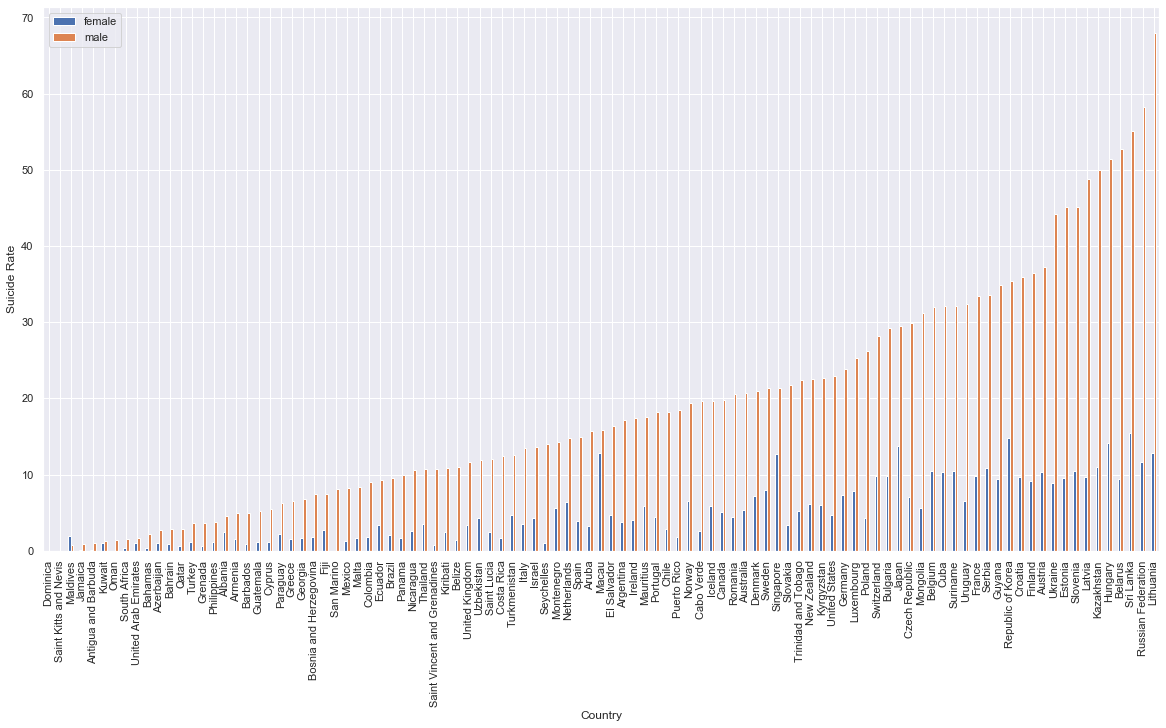

In [116]:
Mean_suicide=Data.groupby(['sex','country'])[['suicides/100k pop']].mean().sort_values('suicides/100k pop').unstack(0)
Mean_suicide.reset_index(inplace=True)
del Mean_suicide.index.name

Mean_suicide.columns=['country','female','male']

Mean_suicide.sort_values('male').plot(x='country',kind='bar',figsize=(20,10))
plt.xlabel('Country')
plt.ylabel('Suicide Rate')


In [117]:
Data.groupby('country')['suicides/100k pop'].mean().sort_values().loc['United States']

13.819811827956993

It seems that places like Kazakhstan are extremely high at 30 suicides per 100k people and South Africa is at the low side at 1 suicide per 100k people. The United States seems to be right in the middle at 13 suicides per 100k people. Lets go ahead and analyze the United States and then compare it to these two other countries to get a feel of what is going on.

In [118]:
Data_filtered=Data[Data.country.isin(['United States','South Africa','Kazakhstan'])]

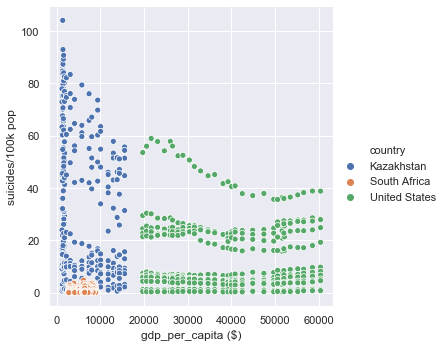

In [119]:
sns.relplot(x='gdp_per_capita ($)',y='suicides/100k pop',data=Data_filtered,hue="country")

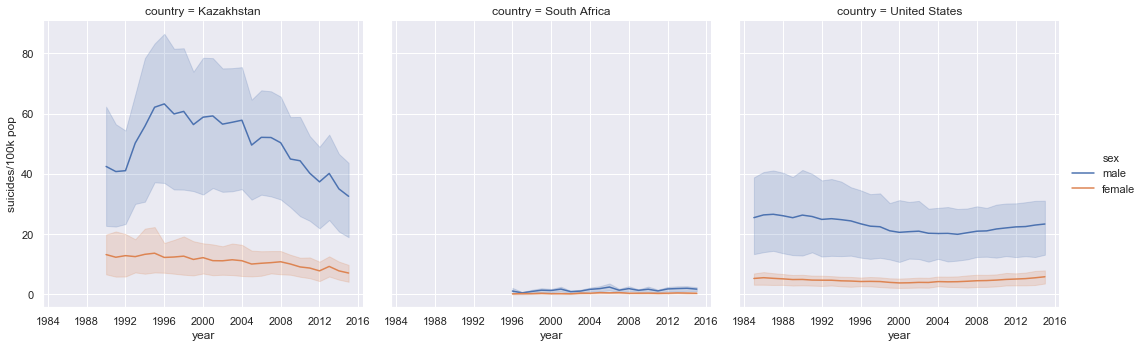

In [120]:
sns.relplot(x='year',y='suicides/100k pop',data=Data_filtered,hue="sex",col='country',kind='line')

For the first graph, the thing to note is that the scales for the United States and Kazakhstan and South Africa are way off. The gpd per capita of the USA is far higher than that of the other two contries but there is a trend that as the gdp per capita increases the total rate does tend downwards. 


For the Second graph, across the board it seems as though males have a higher rate then females in every country.


Lets now take a look at each country individually to get a better idea of whats going on. We will start with the United States.

In [121]:
USA=Data[Data.country=='United States']
KAZ=Data[Data.country=='Kazakhstan']
SA=Data[Data.country=='South Africa']

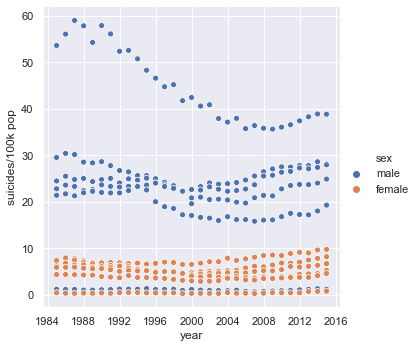

In [122]:
sns.relplot(x='year',y='suicides/100k pop',data=USA,hue='sex')

Interestingly enough when we plot the data as a scatter plot, we start to see patterns pop out at us. It looks as though there are grouped bands in the data that point to another category being very important for this behavior. Lets try and see if age helps clear up these mysterious bands. 

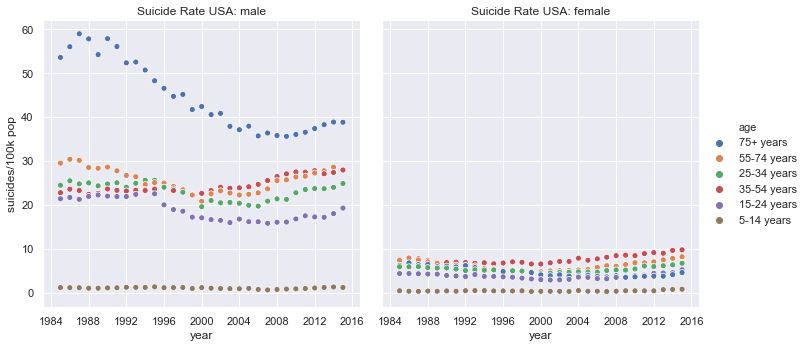

In [123]:

g=sns.relplot(x='year',y='suicides/100k pop',data=USA,col='sex',hue='age')
g.set_titles('Suicide Rate USA: {col_name}')



By chopping these graphs up by age, we start to see what these bands are coming from, age! There are two interesting results from this.

1. Men over the age of 75 are at high risk
2. Women in the age range of 35-54 years are at high risk


It is peculiar that these behaviors differ wildly between genders. It also seems that for men, as the years have gone on there has been some dips for some age groups while for others there has been a rise. Lets see if this trend holds true for the other two countries 

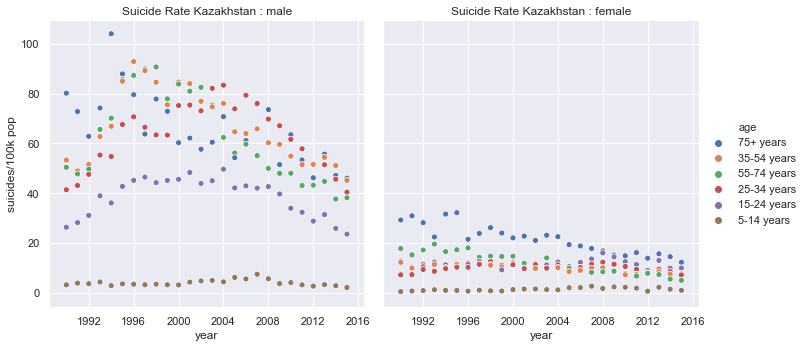

In [124]:
g=sns.relplot(x='year',y='suicides/100k pop',data=KAZ,col='sex',hue='age')
g.set_titles('Suicide Rate Kazakhstan : {col_name}')

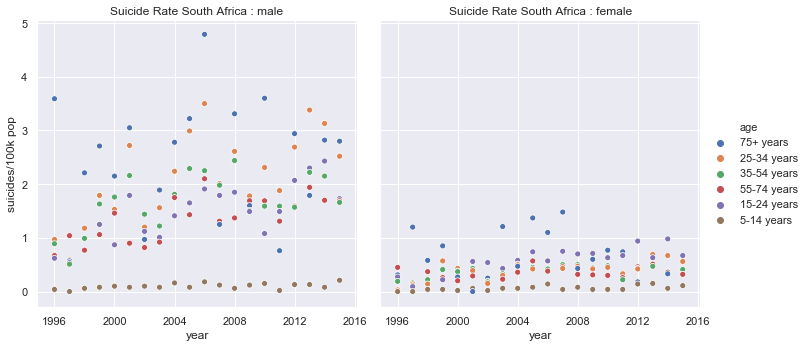

In [125]:
g=sns.relplot(x='year',y='suicides/100k pop',data=SA,col='sex',hue='age')
g.set_titles('Suicide Rate South Africa : {col_name}')

For Kazakhstan and South Africa, the data seems to be more scattered. Neither graphs show the same patterns for age that pop up in the USA data.

It could be that reporting issues have occured, but there isnt any reason trust this notion! At face value there seems to be no good explanation.

Now lets do a little statistical analysis. Lets see if worldwide there is a statistically significant different between the average global suicide rate for men vs. women

In [126]:
Male=Data[Data.sex=='male']
Female=Data[Data.sex=='female']

In [127]:
print( 'The average male suicide rate globally from 1985-2015 is: {}'.format(Male['suicides/100k pop'].mean()))
print( 'The average female suicide rate globally from 1985-2015 is: {}'.format(Female['suicides/100k pop'].mean()))

The average male suicide rate globally from 1985-2015 is: 20.239328540618263
The average female suicide rate globally from 1985-2015 is: 5.3928662832494885


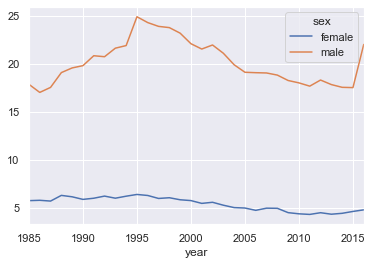

In [128]:
pd.pivot_table(Data[['year','sex','suicides/100k pop']],values='suicides/100k pop',columns='sex',index='year',aggfunc=np.mean).plot()

As you can see, no matter what year it is, and country, the suicide rate among males is much higher than that of females.


Now the HDI is a metric that takes into account education level,income and life expectancy. Lets take a look at if for males this index is related to the suicide rate globally.  

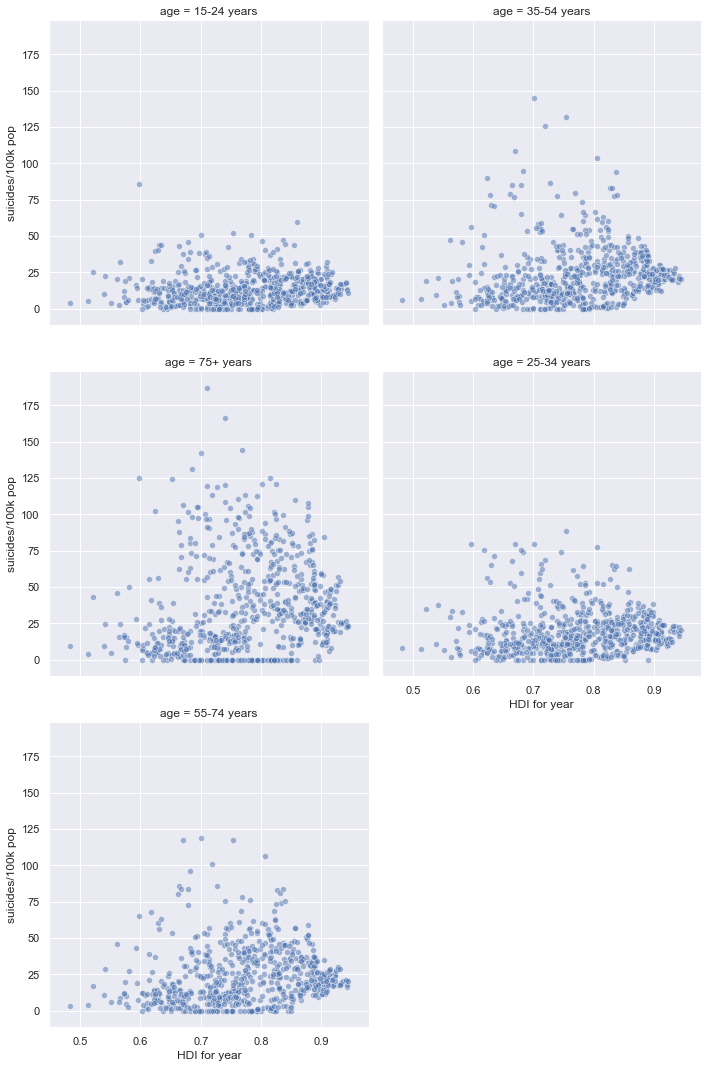

In [129]:
sns.relplot(x='HDI for year',y='suicides/100k pop',data=T,col='age',col_wrap=2,alpha=0.5)

There doesnt seem to be any decent relationship showing up in the data for any age group. This doesnt mean that the HDI doesnt effect suicide, only that the data is inconclusive.


I now want to see if there are any trends with suicide rate by age for different groups of geographically close countries. My hypothesis is that culture is a big factor in these rates.

In [135]:
Data.country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [154]:
Europe=Data[Data.country.isin(['Germany','United Kingdom','Ireland','Scotland','Spain','Italy'])]
Asia=Data[Data.country.isin(['China','Republic of Korea','Japan','Russian Federation'])]

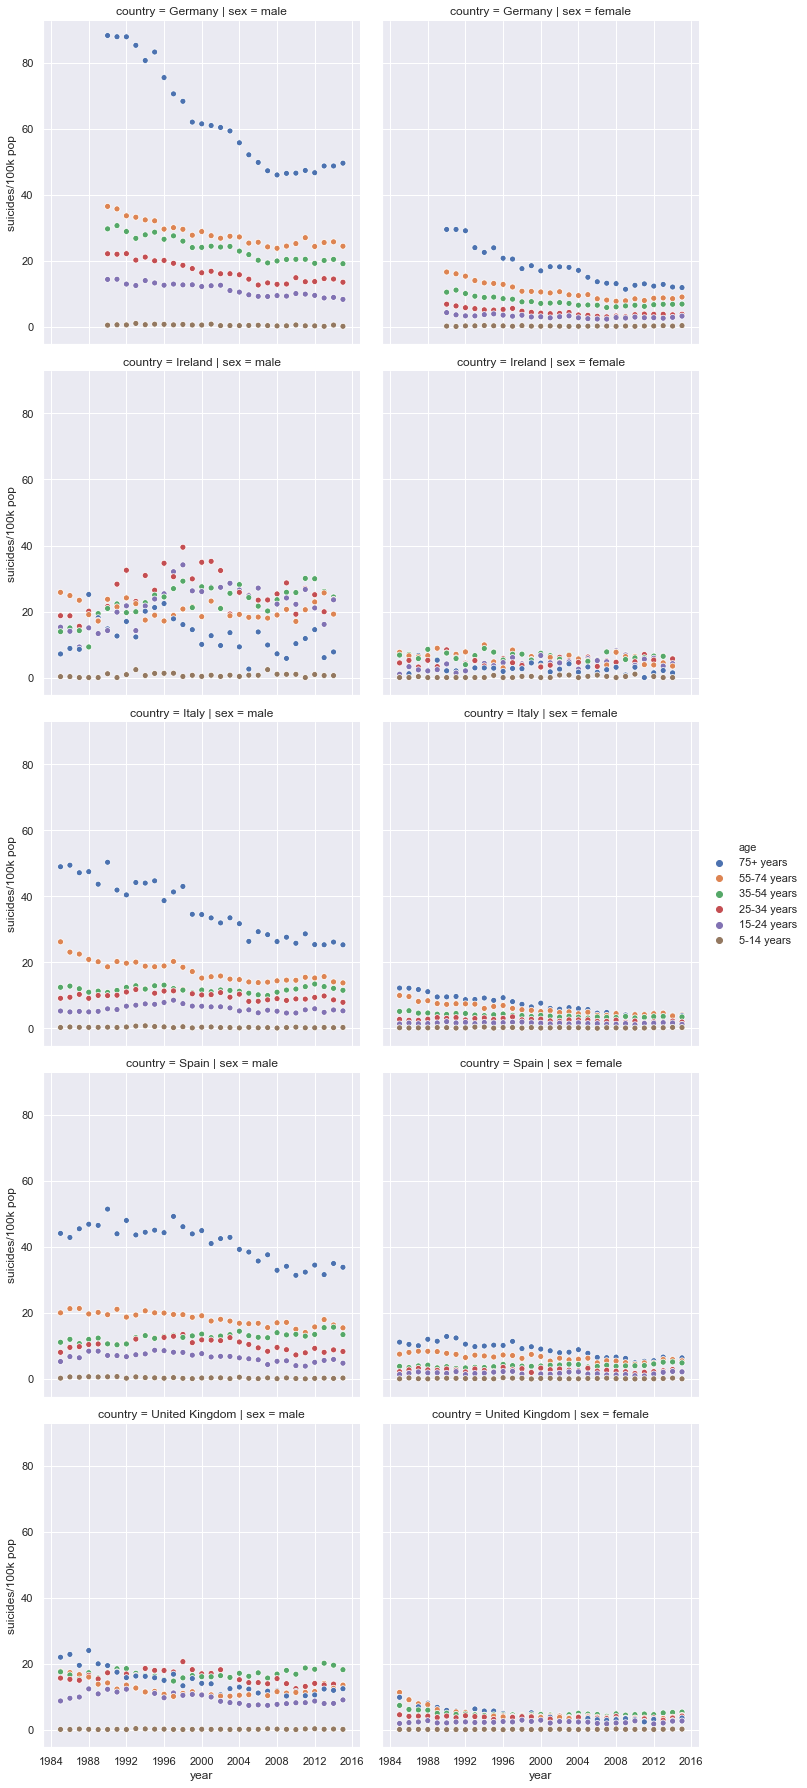

In [159]:
sns.relplot(x='year',y='suicides/100k pop',data=Europe,col='sex',hue='age',row='country')

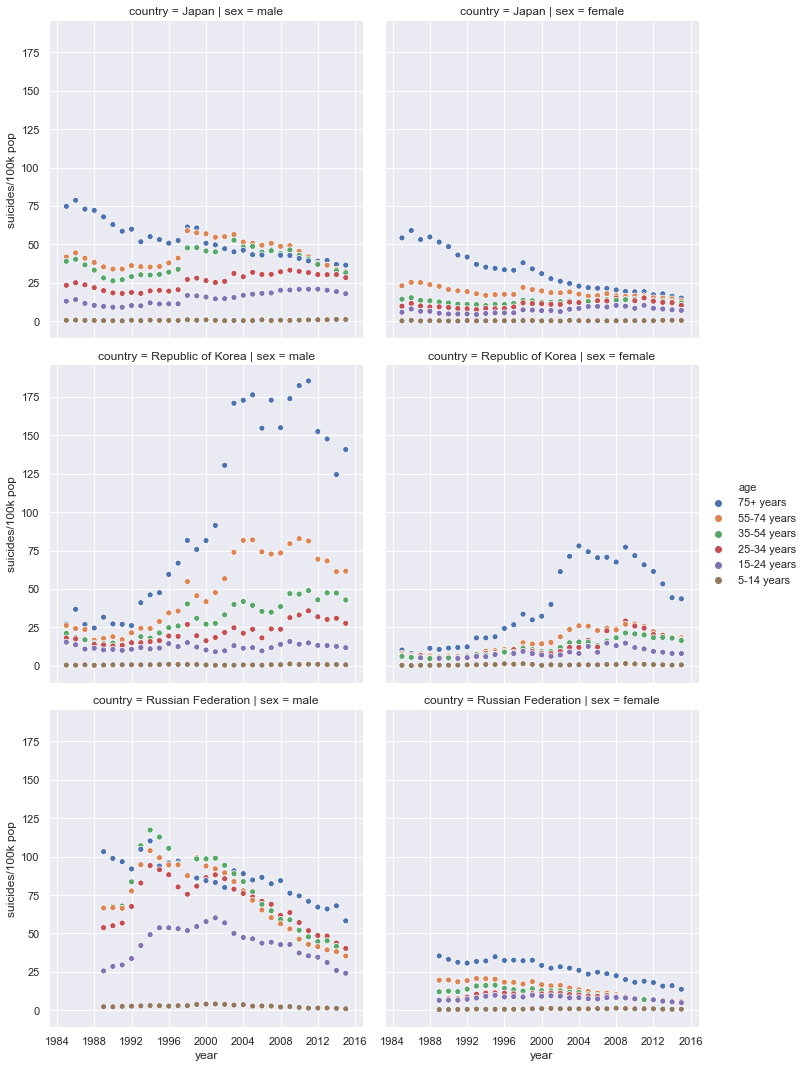

In [158]:
sns.relplot(x='year',y='suicides/100k pop',data=Asia,col='sex',hue='age',row='country')

It seems from these graphs that age plays a big part in every country in terms of the suicide rate. However even geographically grouped contries vary wildly. It seems that the older one gets though, the higher the rate is with few exceptions. The interesting thing is that we compare this with the United States, the males seems to be similar (except in the case of the United Kingdom and Ireland) but the females graph varies greatly. 



I will conclude my analysis here. The key things found were:

1. gpd per capita has a negative relationship with the suicide rate
2. Age has a positive relationship with suicide in most countries for males. Females differe wildly between each country.
3. In the United states it is older males and middle aged females that tend to commit suicide the most. 

This is by no means an exhaustive analysis and more research should be done on the topic in order to refute the above statements or enforce them as well as to find deeper relationships for the causes of suicide. One interesting feature that the data set is missing is demographics related to race. I believe this would be a very interesting feature to have in order to find even more underlying influences on the suicide rate. 